# Notebook for making the GTIs for the two states in Epoch 1 for LMC X-1.

## Here I've split things by the mean 5--10 keV count rate. This is somewhat based on analysis from 2014 where Felix and I did time-resolved spectroscopy of the source and found that there were variations in the strength of the non-thermal continuum with time.

In [1]:
from astropy.io.fits import getdata, getheader
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import astropy.units as u

nu30001039002_A_3to5_01_sr.lc
nu30001039002_B_3to5_01_sr.lc
5to10
nu30001039002_A_5to10_01_sr.lc
nu30001039002_B_5to10_01_sr.lc


/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in true_divide
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in true_divide


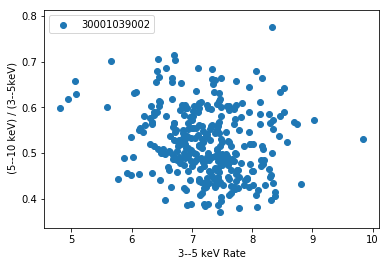

In [14]:
exp_lim = 0.9
for ctr,seqid in enumerate(['30001039002']):
    erange = '3to5'
    set = 0
    for lc in glob('nu'+seqid+'*'+erange+'*sr.lc'):
        print(lc)
        bk = lc.strip('sr.lc')+'bk.lc'

        data, hdr = getdata(lc, header=True)
        bgdata, bghdr = getdata(bk, header=True)
        
        if set == 0:
            set = 1
            timezero = hdr['TIMEZERO']
            dt = hdr['TSTOP'] - hdr['TSTART']
            steps = (np.ceil(dt / hdr['TIMEDEL'])).astype('int')
            tot3to5 = np.zeros(steps)
            tot_err3to5 = np.zeros(steps)
            frac_exp = np.zeros(steps)
            time = np.arange(steps) * hdr['TIMEDEL'] + timezero
        
        inds = ((data['TIME'] + (hdr['TIMEZERO'] - timezero)) / hdr['TIMEDEL']).astype('int')
        good = np.where( ( inds > 0) & (data['FRACEXP']>exp_lim))
            
        tot3to5[inds[good]] += data['RATE'][good] - bgdata['RATE'][good]
        tot_err3to5[inds[good]] += data['ERROR'][good]**2 + bgdata['ERROR'][good]**2
        
    tot_err3to5 = np.sqrt(tot_err3to5)

    
    erange = '5to10'
    print(erange)
    set = 0
    for lc in glob('nu'+seqid+'*'+erange+'*sr.lc'):
        print(lc)
        bk = lc.strip('sr.lc')+'bk.lc'
       
        data, hdr = getdata(lc, header=True)
        bgdata, bghdr = getdata(bk, header=True)
        
        if set == 0:
            set = 1
            timezero = hdr['TIMEZERO']
            dt = hdr['TSTOP'] - hdr['TSTART']
            steps = (np.ceil(dt / hdr['TIMEDEL'])).astype('int')
            tot5to10 = np.zeros(steps)
            tot_err5to10 = np.zeros(steps)
            frac_exp = np.zeros(steps)
            time = np.arange(steps) * hdr['TIMEDEL'] + timezero
        
        inds = ((data['TIME'] + (hdr['TIMEZERO'] - timezero)) / hdr['TIMEDEL']).astype('int')
        good = np.where( ( inds > 0)
                        & (data['FRACEXP']>exp_lim))
        
        tot5to10[inds[good]] += data['RATE'][good] - bgdata['RATE'][good]
        tot_err5to10[inds[good]] += data['ERROR'][good]**2 + bgdata['ERROR'][good]**2
        frac_exp[inds[good]] = data['FRACEXP'][good]

    tot_err5to10 = np.sqrt(tot_err5to10)
    hr = tot5to10 / tot3to5
    hr_err = hr * np.sqrt( (tot_err5to10 / tot5to10)**2 + (tot_err3to5 / tot3to5)**2 )

#    plt.plot(time - time.min(), tot3to5, '.')
    plt.scatter(tot3to5, hr,label=seqid)

plt.xlabel('3--5 keV Rate')
plt.ylabel(' (5--10 keV) / (3--5keV)') 


    
plt.legend()
plt.show()

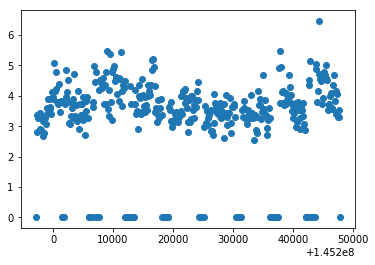

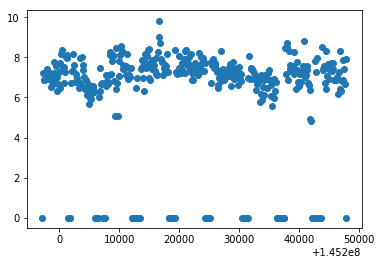

In [22]:
plt.scatter(time, tot5to10)
plt.show()
plt.scatter(time, tot3to5)

In [3]:
# Make the cut here

cut = np.mean(hr[np.where(np.isfinite(hr)&(hr != 0))])
print(cut)
state1 = np.where(hr < cut)
state2 = np.where(hr > cut)



0.0703388493016


/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


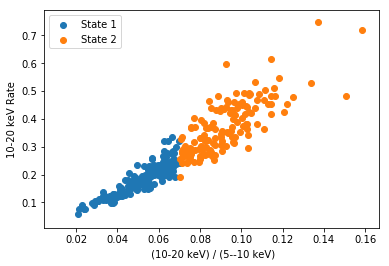

In [5]:
plt.scatter(hr[state1[0]], tot5to10[state1[0]] ,label='State 1')
plt.scatter(hr[state2[0]], tot5to10[state2[0]] ,label='State 2')


plt.ylabel('10-20 keV Rate')
plt.xlabel(' (10-20 keV) / (5--10 keV)') 


plt.legend()
plt.savefig('epoch1_state_split.pdf')
plt.show()

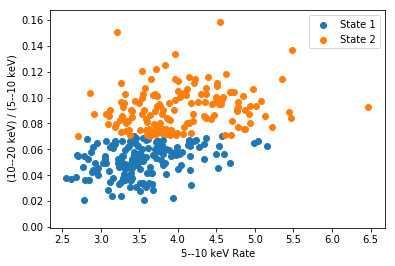

In [6]:
# Here basically we see that the soft channel is *NOT* driving the hardness ratio
plt.scatter(tot3to5[state1[0]], hr[state1[0]],label='State 1')
plt.scatter(tot3to5[state2[0]], hr[state2[0]],label='State 2')


plt.xlabel('5--10 keV Rate')
plt.ylabel(' (10--20 keV) / (5--10 keV)') 

plt.legend()


plt.show()

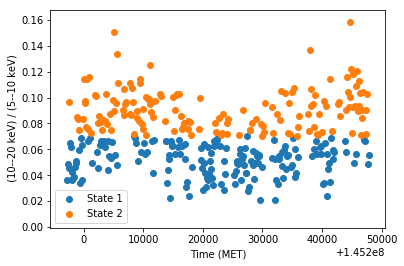

In [7]:
# Show what this does vs time

plt.scatter(time[state1[0]], hr[state1[0]],label='State 1')
plt.scatter(time[state2[0]], hr[state2[0]],label='State 2')

plt.xlabel('Time (MET)')
plt.ylabel(' (10--20 keV) / (5--10 keV)') 
plt.savefig('epoch1_state_lightcurve.pdf')


plt.legend()
plt.show()

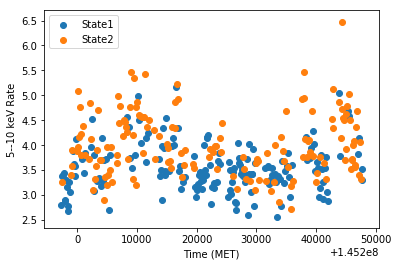

In [35]:
plt.scatter(time[state1[0]], tot3to5[state1[0]],label='State1')
plt.scatter(time[state2[0]], tot3to5[state2[0]],label='State2')


plt.xlabel('Time (MET)')
plt.ylabel('5--10 keV Rate') 
   
plt.legend()
plt.show()

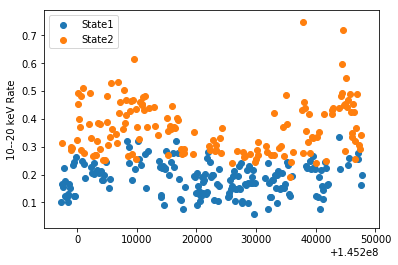

In [36]:
plt.scatter(time[state1[0]], tot5to10[state1[0]],label='State1')
plt.scatter(time[state2[0]], tot5to10[state2[0]],label='State2')

plt.ylabel('10--20 keV Rate')
plt.legend()
plt.show()

In [37]:
f = open('state1_gtis_hr2.txt', 'w')
dt = time[1] - time[0]
print('Time resolution {}'.format(dt))
for bint in state1[0]:
    f.write('{} {}\n'.format(time[bint], time[bint]+dt))
f.close()

f2 = open('state2_gtis_hr2.txt', 'w')
for bint in state2[0]:
    f2.write('{} {}\n'.format(time[bint], time[bint]+dt))
f2.close()

Time resolution 128.0
